# What contributes to lung cancer deaths and what can we do?

In [113]:
import pandas as pd
import os

base_file_path = os.path.join("data_csv/", "a.Lung cancer deaths EU & US longer time period.csv")
base_df = pd.read_csv(base_file_path)

other_files = [f for f in os.listdir("data_csv/") if f.endswith('.csv') and f != "a.Lung cancer deaths EU & US longer time period.csv"]

merged_df = base_df.copy()
for file in other_files:
    file_path = os.path.join("data_csv/", file)
    print(file_path)
    df = pd.read_csv(file_path)
    df = df.drop(columns=['Entity'], errors='ignore')

    merged_df = merged_df.merge(df, on=['Code', 'Year'], how='outer')

merged_df.to_csv('merged_data.csv', index=False)

data_csv/b.sales-of-cigarettes-per-adult-per-day.csv
data_csv/f.public-health-expenditure-share-gdp.csv
data_csv/e.pm25-exposure-gdp 14 years.csv
data_csv/g.life-expectancy-hmd-unwpp.csv
data_csv/d.UK & US emissions-of-air-pollutants 27 years.csv
data_csv/c.air pollutant emissions US & HUN.csv
data_csv/h.access-to-clean-fuels-and-technologies-for-cooking.csv
data_csv/i.US PM10 since 1970.csv


In [114]:
merged_df.shape

(19449, 27)

In [611]:
merged_df[(merged_df['Code'] == 'USA') & (merged_df['Year'] > 1960)].head(5)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total,PM10Primary
18428,USA,United States,1961,38929.0,2.287893,19.750927,21.266054,10.7,1.161500,NaN,...,NaN,17196596.0,20693066.0,122067360.0,701979.56,22633518.0,348453.56,2515911.2,NaN,NaN
18429,USA,United States,1962,41376.0,2.355299,20.653361,22.258445,10.6,1.178456,NaN,...,NaN,17939212.0,21412274.0,126468856.0,699471.75,23375630.0,356025.84,2652803.0,NaN,NaN
18430,USA,United States,1963,43568.0,2.402361,21.426990,23.093763,10.8,1.220847,NaN,...,NaN,18837646.0,22231424.0,130487384.0,684876.25,24134058.0,352851.56,2752941.5,NaN,NaN
18431,USA,United States,1964,45838.0,2.549316,22.188101,23.952427,10.3,1.220847,NaN,...,NaN,19697346.0,23140526.0,134714770.0,663258.44,24868110.0,349030.20,2826117.0,NaN,NaN
18432,USA,United States,1965,48483.0,2.652046,23.125053,25.014705,10.5,1.237803,NaN,...,NaN,20439006.0,24377838.0,138343310.0,655684.06,25603198.0,353011.78,2985927.8,NaN,NaN


In [116]:
merged_df.columns

Index(['Code', 'Entity', 'Year', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population',
       'Manufactured cigarettes sold per adult per day',
       'public_health_expenditure_pc_gdp',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Life expectancy - Type: period - Sex: both - Age: 0', 'PM₁₀ (Index)',
       'PM₂.₅ (Index)', 'Non-methane volatile organic compounds (Index)',
       'Nitrogen oxides (Index)', 'Ammonia (Index)', 'Sulphur dioxide (Index)',
       'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO鈧) emissions',
       'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH鈧) emissions',
       'Proportion of populati

In [117]:
unique_countries = merged_df['Entity'].nunique()
unique_countries

6

In [609]:
data_2021 = merged_df[merged_df['Year'] == 2021].sort_values(
    by='Age-standardized death rate per 100 000 standard population', 
    ascending=False
)
data_2021.head(5)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total,PM10Primary
7922,HUN,Hungary,2021,7867.0,5.055230,39.671053,81.657319,NaN,5.303,NaN,...,NaN,97307.445,14066.39,338867.3,24581.133,110771.06,4717.3413,92114.41,100.0,NaN
15993,SRB,Serbia,2021,4615.0,3.377933,32.056748,67.526776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6,NaN
7619,HRV,Croatia,2021,2814.0,4.487179,31.338165,72.544826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN
14269,POL,Poland,2021,20866.0,4.016423,27.390068,55.292903,NaN,4.785,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN
18488,USA,United States,2021,134592.0,3.885191,20.976992,40.428329,NaN,NaN,NaN,...,NaN,7000289.500,1738428.40,22130986.0,439785.400,10486530.00,131700.8900,4591702.50,100.0,20014.11501


Age-standardised rates (ASR) are a summary measure of the rate of disease that a population would have if it had a standard age structure. Standardisation is necessary when comparing populations that differ with respect to age because age has a powerful influence on the risk of developing/dying from cancer.

The 10 countries with the highest rates of lung cancer and the highest number of deaths from lung cancer in 2022 are shown in the tables below. (cited from https://www.wcrf.org/preventing-cancer/cancer-statistics/lung-cancer-statistics/)

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_time_series_trends(df, country_code, target_variable='Age-standardized death rate per 100 000 standard population'):
    # Filter data for the specific country
    country_df = df[df['Code'] == country_code].copy()
    
    if country_df.empty:
        raise ValueError(f"No data available for country code: {country_code}")
    
    # Ensure 'Year' column exists
    if 'Year' not in country_df.columns:
        raise ValueError("'Year' column is missing from the DataFrame")
    
    # Select relevant columns (excluding non-numeric columns)
    exclude_cols = ['Entity', 'Code', 'Year','Number']
    numeric_cols = []
    for col in country_df.columns:
        if col not in exclude_cols:
            try:
                pd.to_numeric(country_df[col])
                numeric_cols.append(col)
            except ValueError:
                pass
    
    # Check if target_variable is in numeric_cols, if not add it
    if target_variable not in numeric_cols and target_variable in country_df.columns:
        numeric_cols.append(target_variable)

    # Prepare the DataFrame for plotting
    plot_df = country_df[['Year'] + numeric_cols]
    
    # Ensure all columns needed are present
    if len(plot_df.columns) <= 1:
        raise ValueError(f"No numeric data available for country {country_code}")

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(20, 8))
    ax2 = ax1.twinx()

    # Plot GDP per capita on the second y-axis
    gdp_data = plot_df[['Year', 'GDP per capita, PPP (constant 2017 international $)']]
    ax2.plot(gdp_data['Year'], gdp_data['GDP per capita, PPP (constant 2017 international $)'], label='GDP per capita', color='red', marker='o')
    ax2.set_ylabel('GDP per capita', color='red')

    # Plot other variables on the first y-axis
    other_vars = [col for col in numeric_cols if col != 'GDP per capita, PPP (constant 2017 international $)']
    for variable in other_vars:
        data = plot_df[['Year', variable]]
        ax1.plot(data['Year'], data[variable], label=variable, marker='o')

    # Customize the plot
    plt.title(f'Time Series Trends for {country_code}')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value (excluding GDP per capita)')

    # Set x-axis to show all years
    all_years = sorted(plot_df['Year'].unique())
    ax1.set_xticks(all_years)
    ax1.set_xticklabels(all_years, rotation=45)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.tight_layout()
    plt.show()

/var/folders/v9/6mztxyzj60z1wvgxnqd81v9h0000gn/T/ipykernel_68561/3040191614.py:85: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


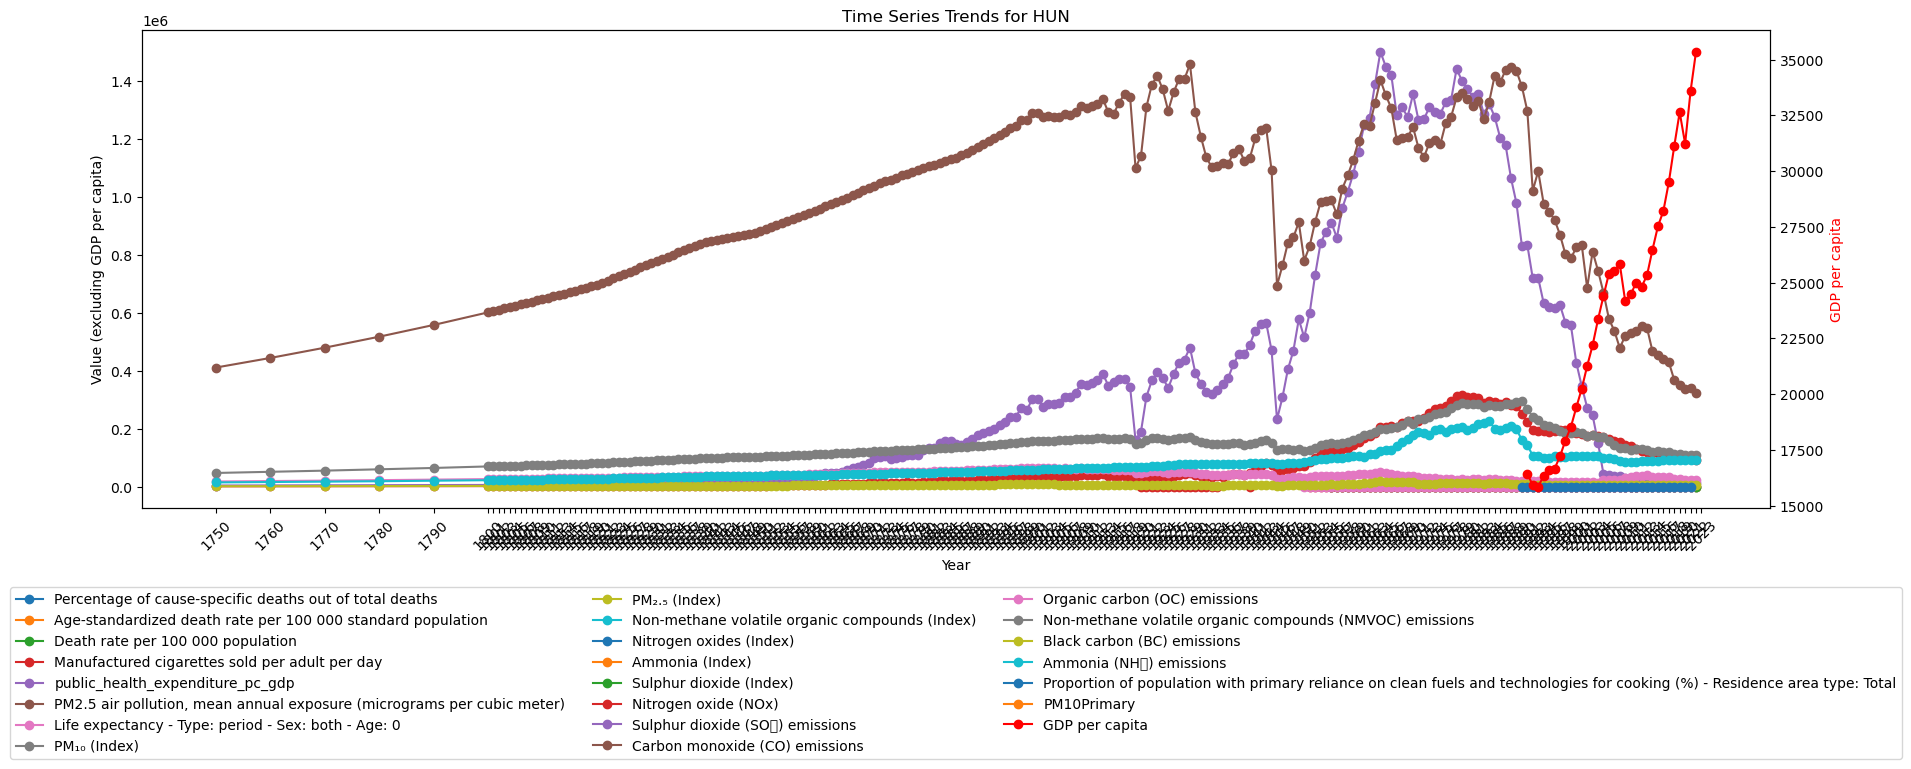

In [127]:
plot_time_series_trends(merged_df,'HUN')

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pairplots_for_all_countries(df, target_variable='Age-standardized death rate per 100 000 standard population'):
    # Variables of interest
    variables_of_interest = [
        # 'Prevalence of current tobacco use (% of adults)',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total',
        'public_health_expenditure_pc_gdp',
        'GDP per capita, PPP (constant 2017 international $)'
    ]
    
    # Ensure target variable is included
    variables_of_interest.append(target_variable)
    
    # Filter the dataframe for the selected variables and remove NaN values
    plot_df = df[variables_of_interest].dropna()
    
    # Number of rows needed for the pair plots (two columns per row)
    num_plots = len(variables_of_interest) - 1  # Subtract 1 to exclude the target variable
    num_rows = (num_plots + 1) // 2  # Calculate number of rows for two columns per row
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))
    
    # Flatten axes array to easily iterate through
    axes = axes.flatten()
    
    # Loop through the variables and plot them
    for i, col in enumerate(variables_of_interest[:-1]):  # Exclude the target variable itself
        sns.regplot(data=plot_df, x=col, y=target_variable, ax=axes[i], 
                    scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_variable)
        
        # Calculate and display correlation
        correlation = plot_df[col].corr(plot_df[target_variable])
        axes[i].text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top')
    
    # Hide any empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout
    plt.suptitle('Relationship between Variables and Lung Cancer Death Rate\n(All Countries)', fontsize=16)
    plt.tight_layout()
    
    return plot_df

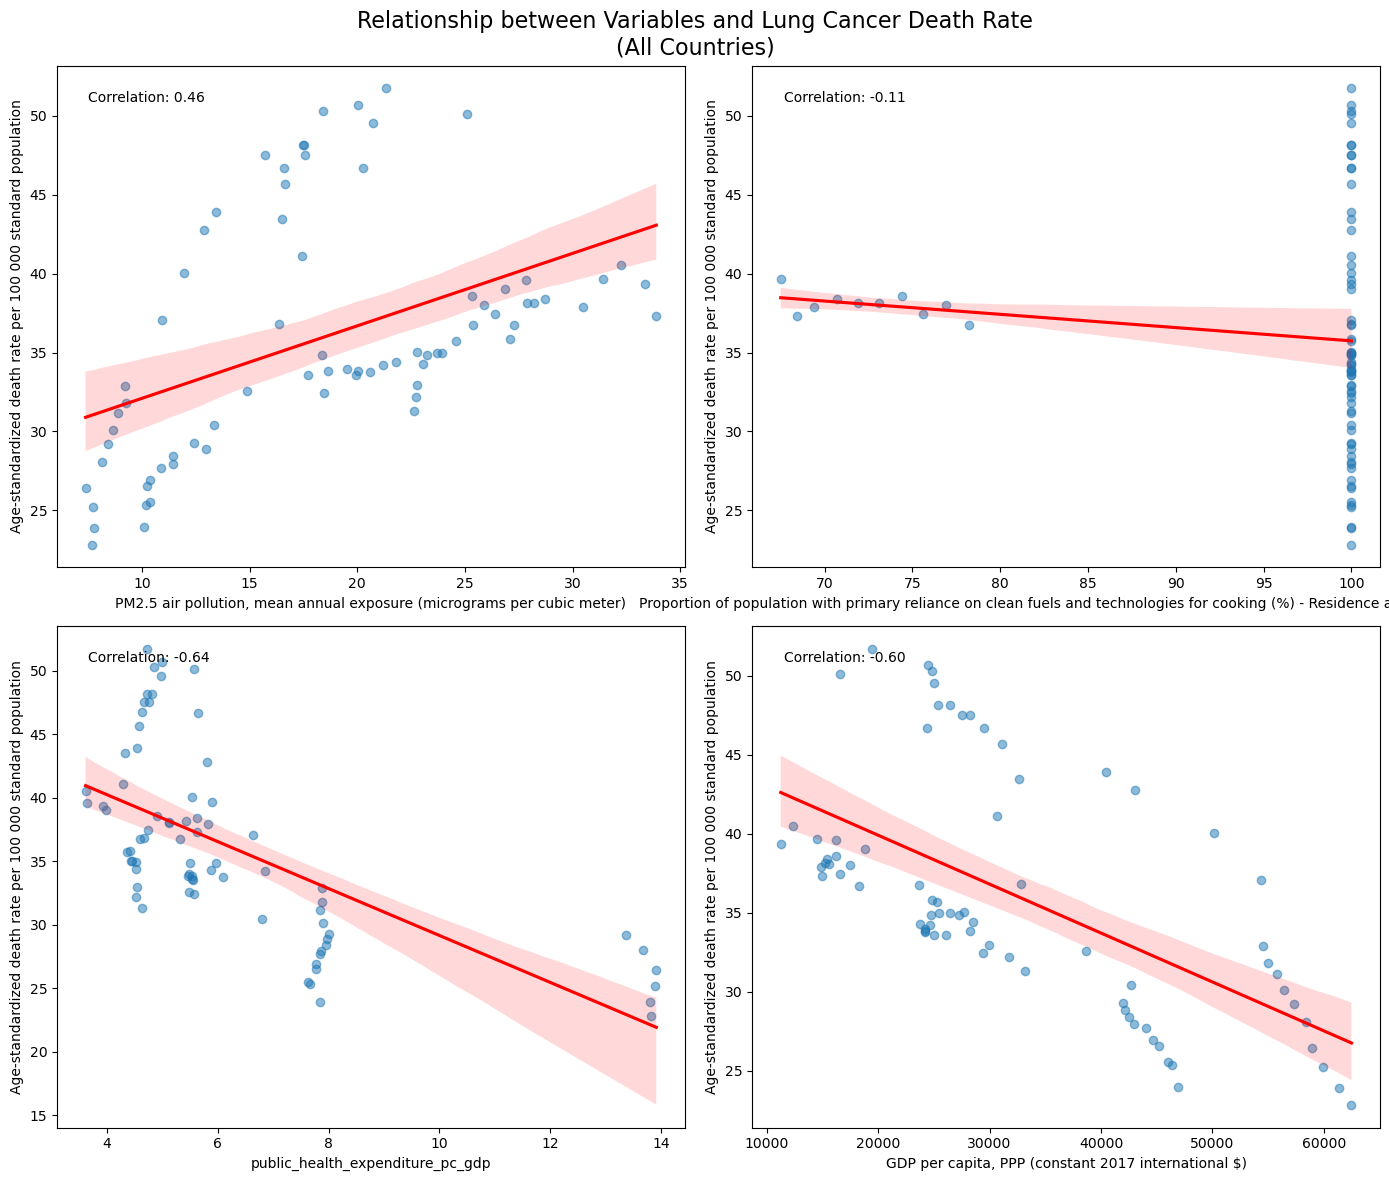

In [129]:
# Plot for all countries
all_countries_data = pairplots_for_all_countries(merged_df)

In [130]:
def pair_plot_age_standardized(df, country_code):
    country_df = df[df['Code'] == country_code].copy()
    
    # Sort by year to ensure correct plotting
    country_df = country_df.sort_values('Year')
    
    # Target variable for y-axis
    y_col = 'Age-standardized death rate per 100 000 standard population'
    if y_col not in country_df.columns:
        print(f"{y_col} not found in data.")
        return
    
    numeric_cols = country_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Number', y_col]]
    
    # Drop rows where the target variable is NaN
    country_df = country_df.dropna(subset=[y_col])
    
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2  # Ceiling division for rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    # Plot each variable
    for i, col in enumerate(numeric_cols):
        subset_df = country_df.dropna(subset=[col])
        
        axes[i].scatter(subset_df[col], subset_df[y_col], alpha=0.7, color='blue')
        
        axes[i].set_title(f'{col} vs. {y_col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel(y_col, fontsize=12)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout
    plt.suptitle(f'Pairwise Plots for {country_code}', fontsize=16)
    plt.tight_layout()
    
    return country_df


/var/folders/v9/6mztxyzj60z1wvgxnqd81v9h0000gn/T/ipykernel_68561/2722442690.py:58: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


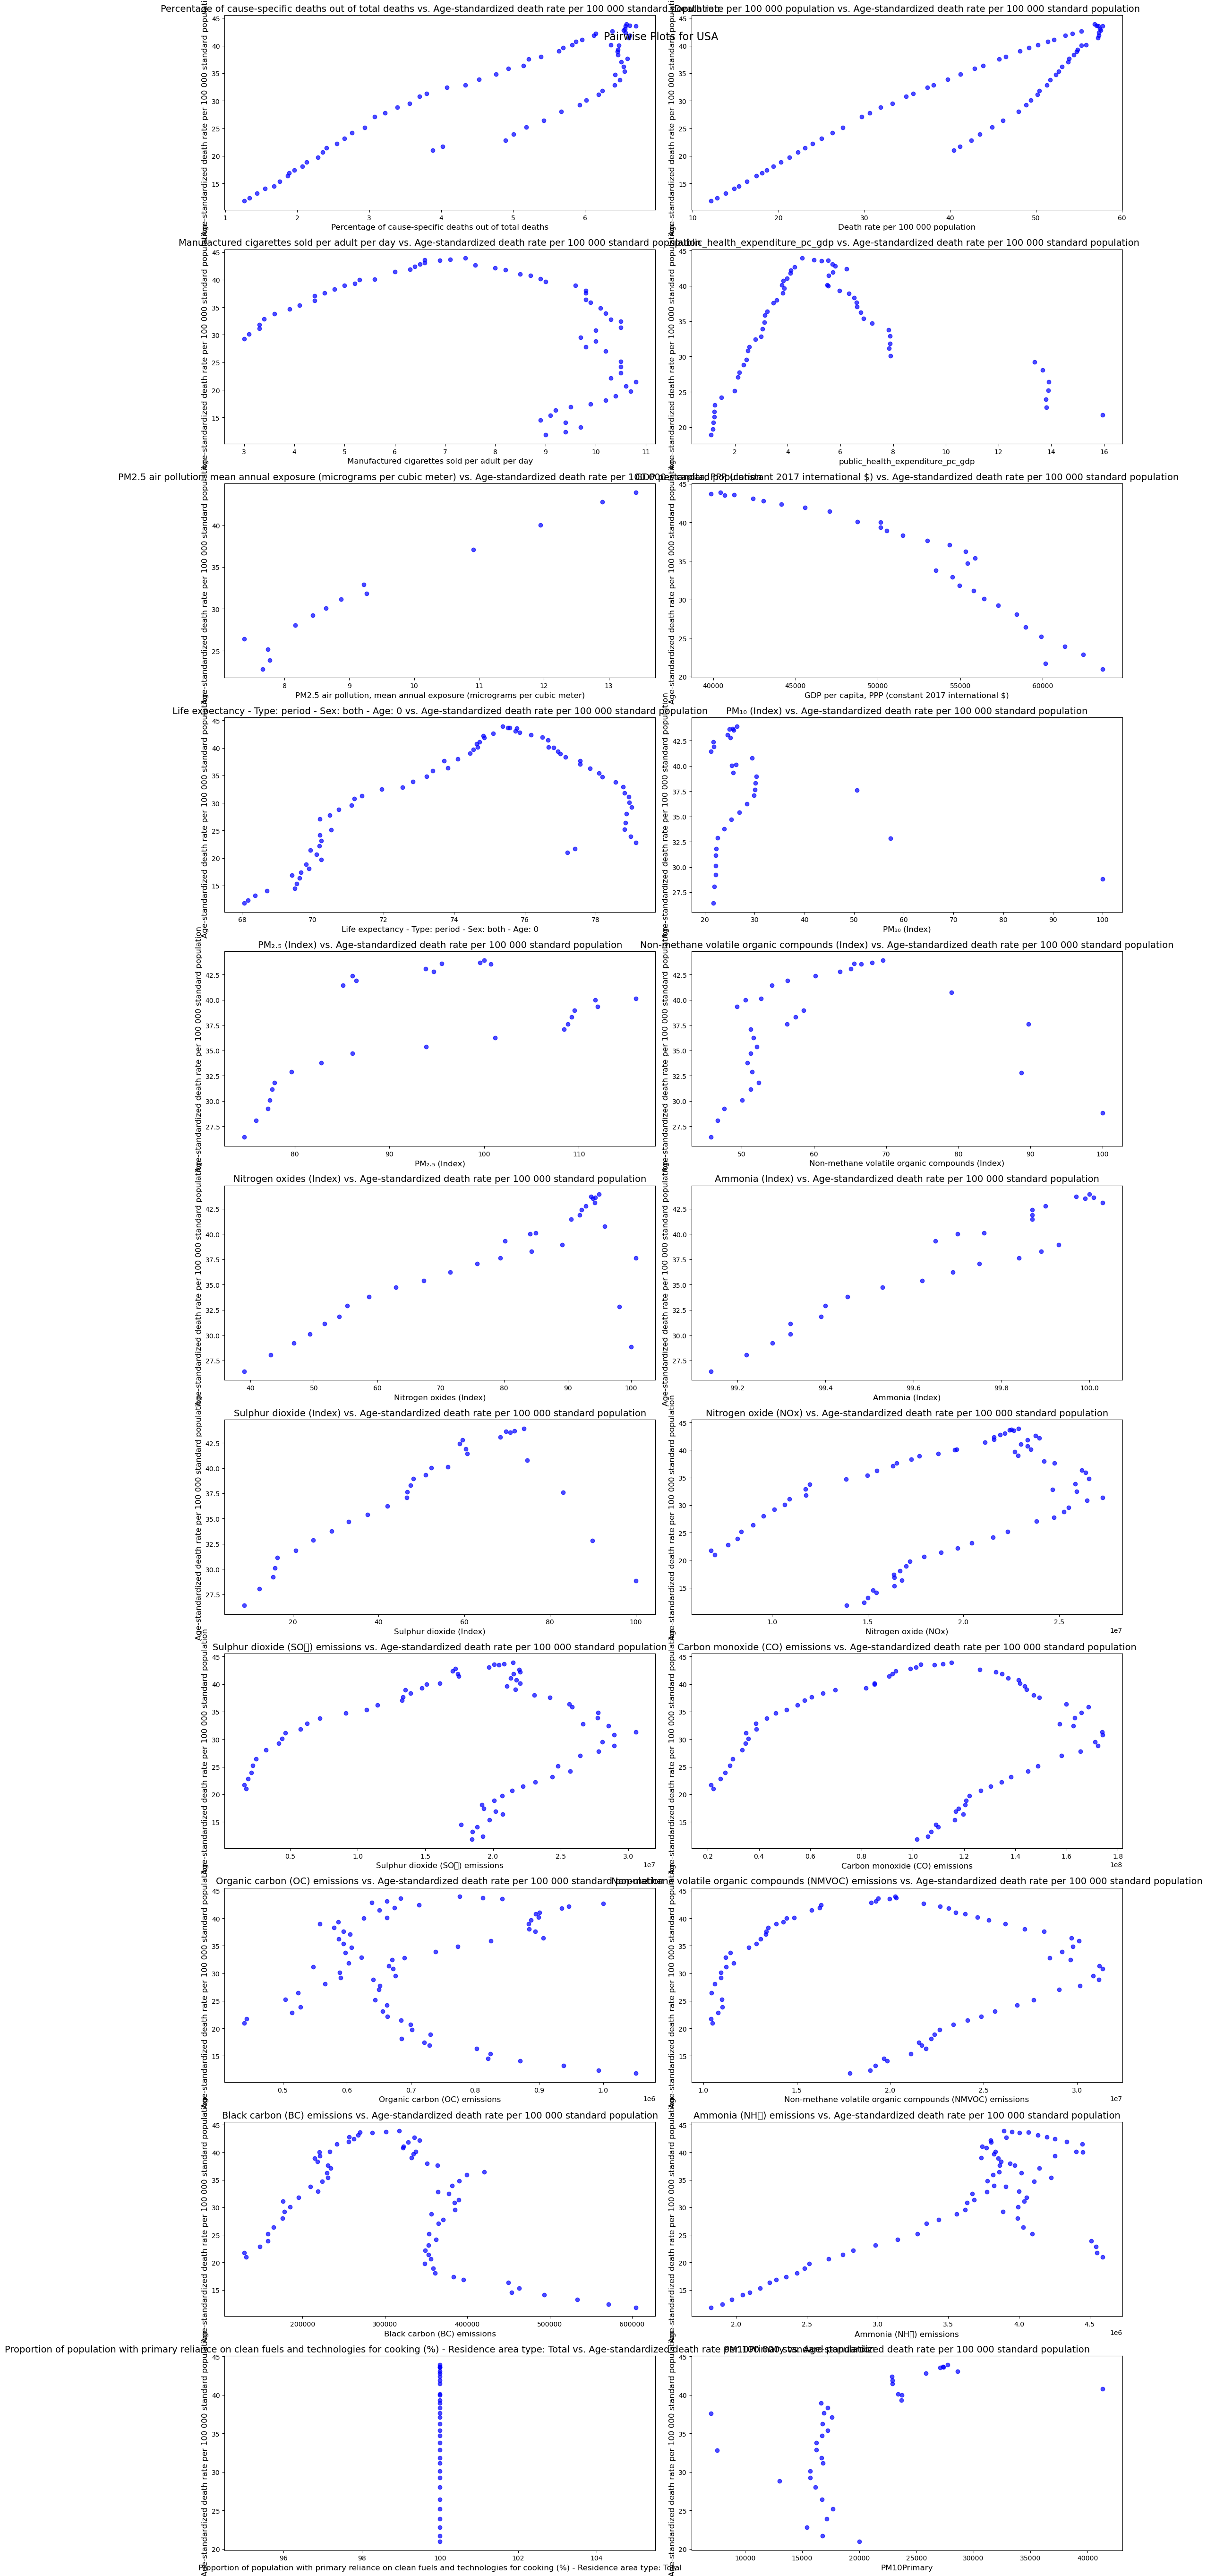

In [131]:
usa4 = pair_plot_age_standardized(merged_df,'USA')

In [607]:
def plot_normalized_data(df, country_code):
    # Define the columns to plot
    columns_to_plot = [
        'Age-standardized death rate per 100 000 standard population',
        # 'Death rate per 100 000 population',
        'Manufactured cigarettes sold per adult per day',
        'public_health_expenditure_pc_gdp',
        'Carbon monoxide (CO) emissions'
        # 'Black carbon (BC) emissions',
        # 'PM10Primary',
        # 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
        # 'Life expectancy - Type: period - Sex: both - Age: 0',
        # 'PM₂.₅ (Index)'
        # 'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'
    ]
    
    # Filter data for the specified country
    country_data = df[df['Code'] == country_code]
    # only for HUN
    # country_data = country_data[country_data["Year"] >= 1920]

    # Sort by year and interpolate missing values
    country_data = country_data.sort_values('Year')
    interpolated_data = country_data[['Year'] + columns_to_plot].interpolate(method='linear', axis=0)
    
    # Normalize the data
    normalized_data = interpolated_data.copy()
    for column in columns_to_plot:
        if column in normalized_data.columns:
            normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / \
                                      (normalized_data[column].max() - normalized_data[column].min())
    
    # Plot the normalized data
    plt.figure(figsize=(14, 10))
    for column in columns_to_plot:
        if column in normalized_data.columns:
            plt.plot(normalized_data['Year'], normalized_data[column], label=column, alpha=0.8)
    
    plt.ylim(0, 1.5)
    plt.title(f"Normalized Trends for {country_code} Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Normalized Value (0-1)", fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


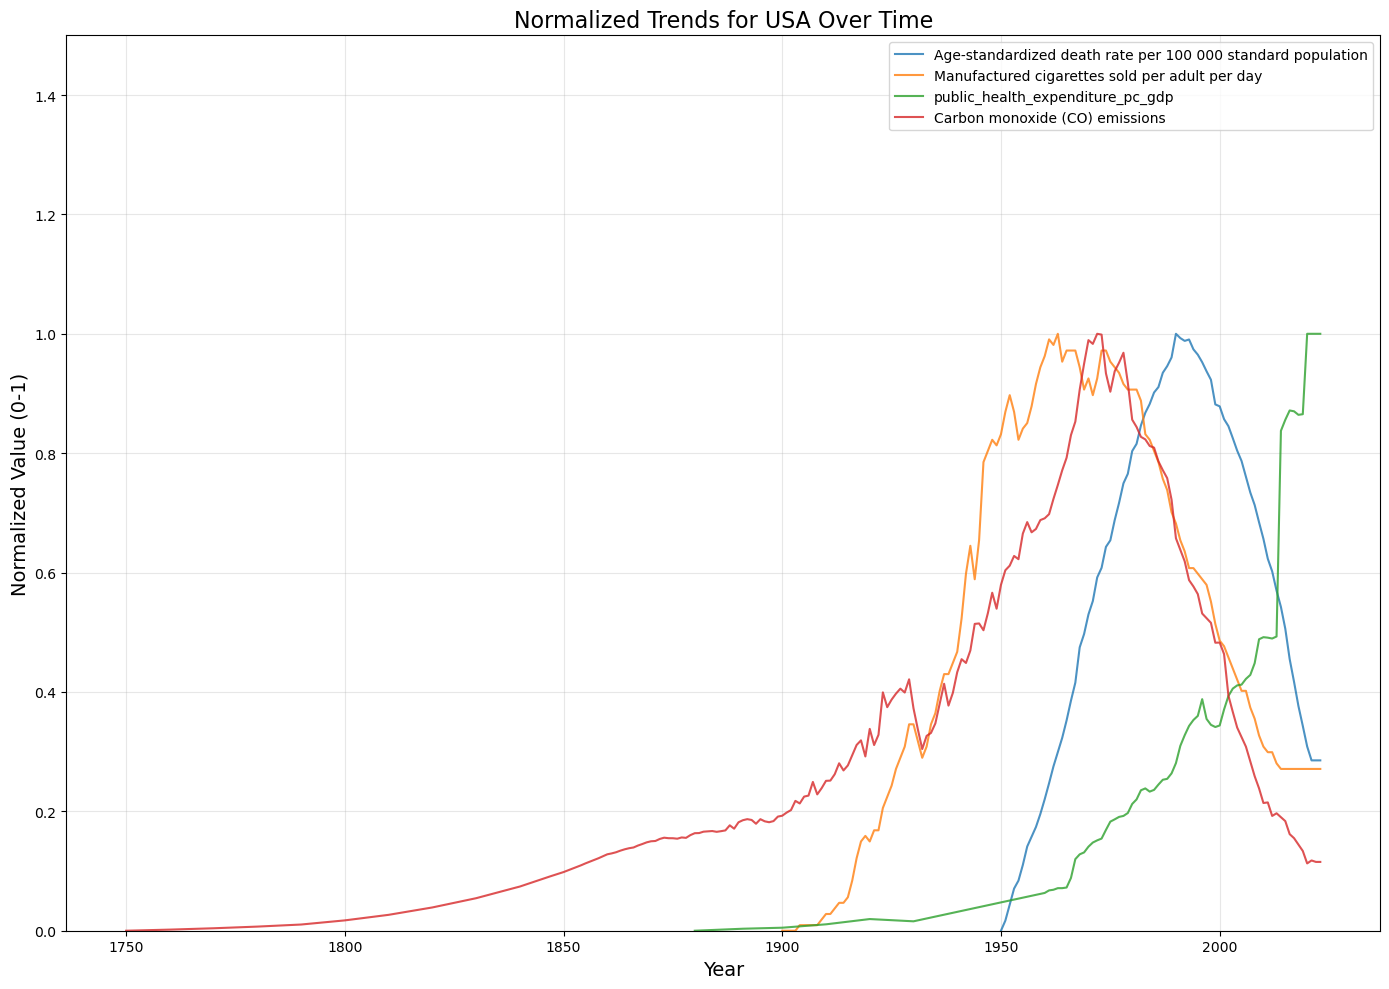

In [605]:
usa3 = plot_normalized_data(merged_df,'USA')

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_clean = merged_df[[
    "Code", "Entity", "Year", "Death rate per 100 000 population", 
    "Manufactured cigarettes sold per adult per day", 
    "public_health_expenditure_pc_gdp", 
    "Life expectancy - Type: period - Sex: both - Age: 0", 
    "Carbon monoxide (CO) emissions"
    # "PM10Primary"
]]
#rename the columns for easier access
data_clean.columns = ["Code", "Entity", "Year", "Death", "Cigarette", "HealthExpense", "LifeExpectancy", "CO"]

# Filter data for the United States and relevant years
data_us = data_clean[data_clean["Code"] == "USA"]
start_year = 1950
end_year = 2020
lag = 30

filtered_data = data_us[(data_us["Year"] >= start_year) & (data_us["Year"] <= end_year)].copy() 
filtered_data["Cigarette"] = data_us.loc[data_us["Year"].between(start_year-lag, end_year-lag), "Cigarette"].values
filtered_data["CO"] = data_us.loc[data_us["Year"].between(start_year-lag, end_year-lag), "CO"].values / 1e7

# Define and fit the linear regression model
model = smf.ols("Death ~ Cigarette + LifeExpectancy + CO + HealthExpense", data=filtered_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     406.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.19e-40
Time:                        23:01:23   Log-Likelihood:                -129.79
No. Observations:                  61   AIC:                             269.6
Df Residuals:                      56   BIC:                             280.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         46.8388     30.237      1.

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1627.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.76e-58
Time:                        23:02:18   Log-Likelihood:                -152.72
No. Observations:                  71   AIC:                             311.4
Df Residuals:                      68   BIC:                             318.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9949      0.789      3.796      0.0

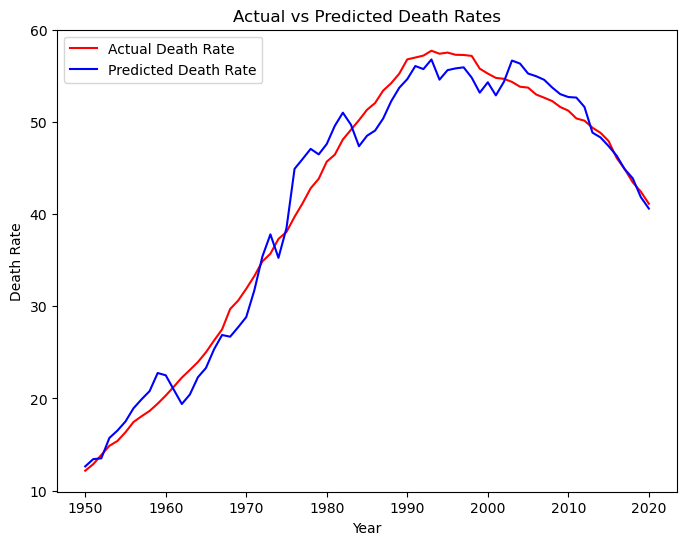

In [603]:
# Simplify the model (stepwise-like selection)
model_simplified = smf.ols("Death ~ Cigarette + CO", data=filtered_data).fit()
print(model_simplified.summary())

# Generate predictions using the simplified model
filtered_data["Cigarette"] = filtered_data["Cigarette"].interpolate()
filtered_data["Predicted_Death"] = model_simplified.predict(filtered_data[["Cigarette","CO"]]) 

# Plot true vs. predicted death rates
plt.figure(figsize=(8,6))
plt.plot(filtered_data["Year"], filtered_data["Death"], color="red", label="Actual Death Rate")
plt.plot(filtered_data["Year"], filtered_data["Predicted_Death"], color="blue", label="Predicted Death Rate")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Actual vs Predicted Death Rates")
plt.legend()
plt.show()


In the linear model above, we set a fixed lag of 30 years based on domain knowledge. But is that really the best latency to model our data? Can we consider cumulative effects of long-term smoking to lung cancer deaths? Let's try using a lagged range of time to model the death rate for Hungary, using Bayesian Linear Regression with MCMC sampling.

In [507]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Data for Hungary
data_hun = data_clean[data_clean["Code"] == "HUN"][["Code", "Entity", "Year", "Death", "Cigarette", "CO"]]
data_hun["Cigarette"] = data_hun["Cigarette"].interpolate()
data_hun["CO"] = data_hun["CO"].interpolate()

# Precompute lagged data and add those as our new features
time_lag = np.arange(25, 35)
for lag in time_lag:
    data_hun[f"Cigarette_lag_{lag}"] = data_hun["Cigarette"].shift(lag)
    data_hun[f"Pollution_lag_{lag}"] = data_hun["CO"].shift(lag)

start_year = 1955
end_year = 2020
data_hun = data_hun[(data_hun["Year"] >= start_year) & (data_hun["Year"] <= end_year)]

with pm.Model() as hungary_model:
    beta_i = pm.Normal("beta_i", mu=0, sigma=10)
    beta_cig = pm.Normal("beta_cig", mu=0, sigma=10)
    beta_pollutant = pm.Normal("beta_pollutant", mu=0, sigma=10)
    
    # Create a tensor for all lagged variables
    cig_lags = np.column_stack([data_hun[f"Cigarette_lag_{lag}"] for lag in time_lag])
    pollution_lags = np.column_stack([data_hun[f"Pollution_lag_{lag}"] for lag in time_lag])

    # Use Dirichlet to create a probability distribution over the time range
    lag_weights = pm.Dirichlet("lag_weights", a=np.ones(len(time_lag)))
    
    # Weighted sum of lagged variables
    lagged_data_cig = pm.math.sum(cig_lags * lag_weights, axis=1)
    lagged_data_pollution = pm.math.sum(pollution_lags * lag_weights, axis=1)
    
    mu = beta_i + beta_cig * lagged_data_cig + beta_pollutant * lagged_data_pollution
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("Death", mu=mu, sigma=sigma, observed=data_hun["Death"].values)

In [482]:
# pip install arviz

In [499]:
with hungary_model:
    trace = pm.sample(500, tune=1000, cores=1)

pm.summary(trace, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_i, beta_cig, beta_pollutant, lag_weights, sigma]


Output()

Output()

Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_i,28.204,3.716,20.741,34.835,0.222,0.161,285.0,644.0,1.01
beta_cig,8.337,0.149,8.063,8.647,0.006,0.004,674.0,596.0,1.00
beta_pollutant,-0.000,0.000,-0.000,-0.000,0.000,0.000,284.0,517.0,1.01
lag_weights[0],0.066,0.047,0.000,0.152,0.002,0.001,642.0,583.0,1.00
lag_weights[1],0.062,0.047,0.000,0.154,0.002,0.001,573.0,275.0,1.00
lag_weights[2],0.096,0.062,0.003,0.219,0.002,0.002,671.0,342.0,1.00
lag_weights[3],0.088,0.064,0.000,0.209,0.002,0.002,531.0,360.0,1.00
lag_weights[4],0.077,0.059,0.000,0.198,0.002,0.002,291.0,222.0,1.00
lag_weights[5],0.053,0.044,0.000,0.138,0.002,0.001,400.0,220.0,1.00
lag_weights[6],0.050,0.046,0.000,0.145,0.001,0.001,564.0,328.0,1.00


array([[<Axes: title={'center': 'beta_i'}>,
        <Axes: title={'center': 'beta_i'}>],
       [<Axes: title={'center': 'beta_cig'}>,
        <Axes: title={'center': 'beta_cig'}>],
       [<Axes: title={'center': 'beta_pollutant'}>,
        <Axes: title={'center': 'beta_pollutant'}>]], dtype=object)

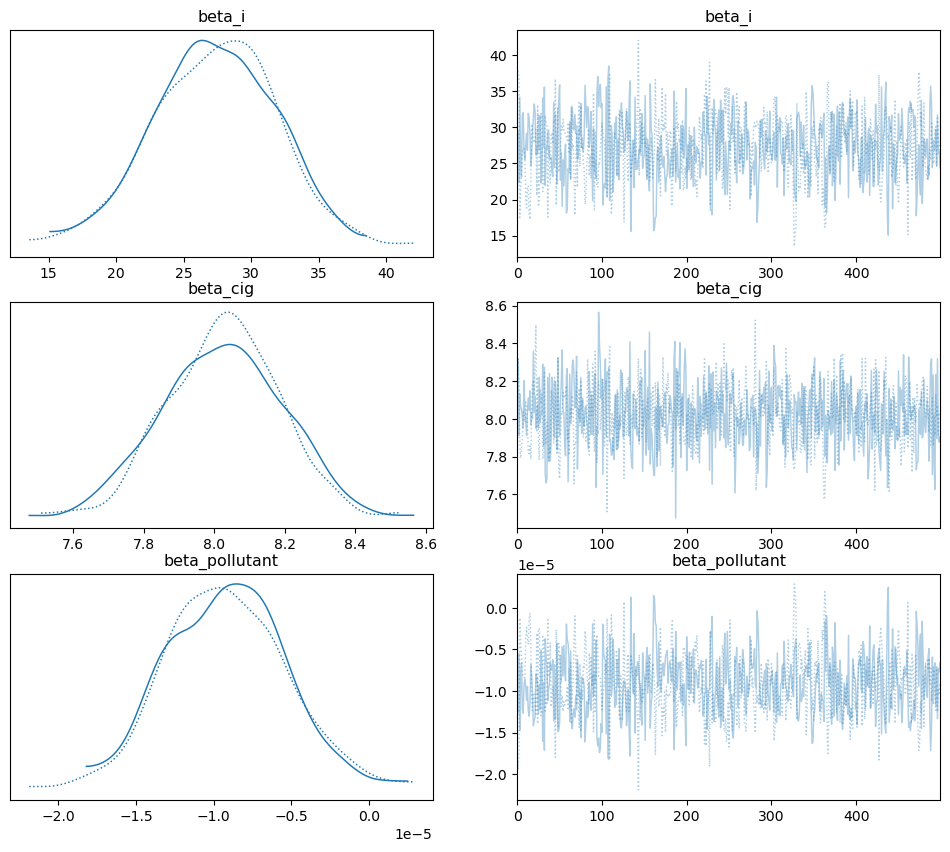

In [478]:
az.plot_trace(trace, var_names=["beta_i", "beta_cig", "beta_pollutant"],figsize=(12, 10))

Let's see how our poterior model performs comparing to what was observed

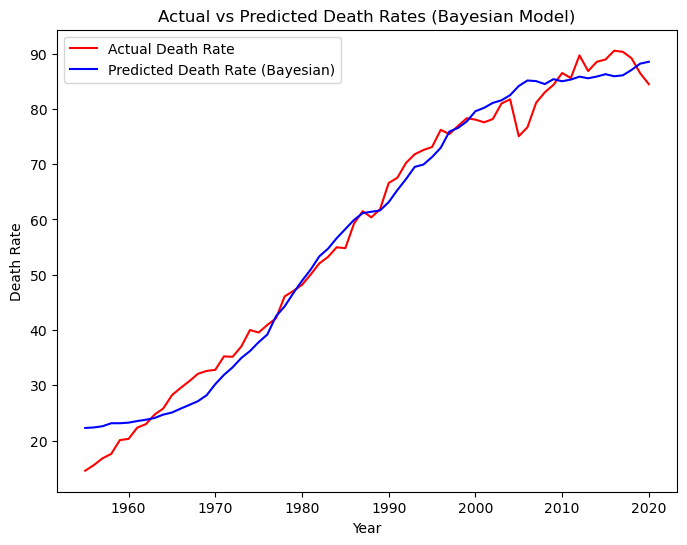

In [595]:
with hungary_model:
    trace = pm.sample(500, tune=1000, cores=1, return_inferencedata=True)

posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["Death"], model=hungary_model)
# print(posterior_predictive.posterior_predictive)
predicted_deaths = posterior_predictive.posterior_predictive["Death"].mean(dim=["chain", "draw"])

# Plot true vs predicted death rates
plt.figure(figsize=(8,6))
plt.plot(data_hun["Year"], data_hun["Death"], color="red", label="Actual Death Rate")
plt.plot(data_hun["Year"], predicted_deaths, color="blue", label="Predicted Death Rate (Bayesian)")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Actual vs Predicted Death Rates (Bayesian Model)")
plt.legend()
plt.show()